# 1、决策树知识点

## 1.1伪代码
输入： 训练集D={($x_1$,$y_1$),($x_2$,$y_2$),....,($x_m$,$y_m$)};    
特征集A={$a_1$,$a_2$,....,$a_d$}
    
输出： 以node为根节点的一颗决策树
    
过程：函数TreeGenerate($D$,$A$)    
1. 生成节点node    
2. $if$ $D$中样本全书属于同一类别$C$ $then$:    
3. ----将node标记为$C$类叶节点；$return$    
4. $if$ $A$ = 空集 OR D中样本在$A$上的取值相同 $then$:
5. ----将node标记为叶节点，其类别标记为$D$中样本数最多的类；$return$
6. 从 $A$ 中选择最优划分属性 $a_*$;
7. $for$ $a_*$ 的每一个值 $a_*^v$ $do$:
8. ----为node生成一个分支，令$D_v$表示$D$中在$a_*$上取值为$a_*^v$的样本子集；
9. ----$if$ $D_v$ 为空 $then$:
10. --------将分支节点标记为叶节点，其类别标记为$D$中样本最多的类;$then$
11. ----$else$:
12. --------以 TreeGenerate($D_v$,$A$\{$a_*$})为分支节点


决策树的构建过程是一个递归过程。函数存在三种返回状态：（1）当前节点包含的样本全部属于同一类别，无需继续划分；（2）当前属性集为空或者所有样本在某个属性上的取值相同，无法继续划分；（3）当前节点包含的样本集合为空，无法划分。

## 1.2 划分选择

从上述伪代码中我们发现，决策树的关键在于line6.从$A$中选择最优划分属性$𝑎_∗$，一般我们希望决策树每次划分节点中包含的样本尽量属于同一类别，也就是节点的“纯度”更高。

### 1.2.1信息增益

信息熵是一种衡量数据混乱程度的指标，信息熵越小，则数据的“纯度”越高

$\operatorname{Ent}(D)=-\sum_{k=1}^{|\mathcal{Y}|} p_{k} \log _{2} p_{k}$

假设离散属性$a$有$V$个可能的取值{$a^1$,$a^2$,....,$a^V$}，若使用$a$对数据集$D$进行划分，则产生$D$个分支节点，记为$D^v$。则使用$a$对数据集进行划分所带来的信息增益被定义为：

$\operatorname{Gain}(D, a)=\operatorname{Ent}(D)-\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Ent}\left(D^{v}\right)$

一般的信息增益越大，则意味着使用特征$a$来进行划分的效果越好。

### 1.2.2 基尼指数


$\begin{aligned}
\operatorname{Gini}(D) &=\sum_{k=1}^{|\mathcal{Y}|} \sum_{k^{\prime} \neq k} p_{k} p_{k^{\prime}} \\
&=1-\sum_{k=1}^{|\mathcal{Y}|} p_{k}^{2}
\end{aligned}$


基尼指数反映了从数据集$D$中随机抽取两个的类别标记不一致的概率。

$\operatorname{Gini}\operatorname{index}(D, a)=\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Gini}\left(D^{v}\right)$

使用特征$a$对数据集$D$划分的基尼指数定义为上。

## 1.3 重要参数

### 1.3.1 criterion

Criterion这个参数正是用来决定模型特征选择的计算方法的。sklearn提供了两种选择：

- 输入”entropy“，使用信息熵（Entropy）

- 输入”gini“，使用基尼系数（Gini Impurity）

### 1.3.2 random_state & splitter
random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显。splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。

### 1.3.3 max_depth

限制树的最大深度，超过设定深度的树枝全部剪掉。这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所以限制树深度能够有效地限制过拟合。

### 1.3.4 min_samples_leaf

min_samples_leaf 限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生。一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。

## 2、Demo实践
### Step1:库函数导入

In [1]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入决策树模型函数
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Step2:训练模型

In [2]:
# 构造数据
x_features = np.array([[-1,-2],[-2,-1],[-3,-2],[1,3],[2,1],[3,2]])
y_label = np.array([0, 1, 0, 1, 0, 1])
#调用决策树模型
tree_clf = DecisionTreeClassifier()
#训练
tree_clf.fit(x_features, y_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Step3:数据和模型可视化（需要用到graphviz可视化库）

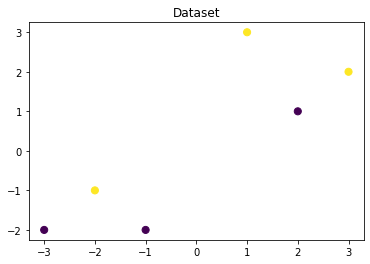

In [3]:
## 可视化构造的数据样本点
plt.figure()
plt.scatter(x_features[:,0],x_features[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

In [4]:
import graphviz
dot_data = tree.export_graphviz(tree_clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("pengunis")

'pengunis.pdf'

### Step4:模型预测

In [5]:
# 创建新样本
x_features_new1 = np.array([[0,-1]])
x_features_new2 = np.array([[2,1]])

#利用训练好的模型进行预测
y_label_new1_predict = tree_clf.predict(x_features_new1)
y_label_new2_predict = tree_clf.predict(x_features_new2)
print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

The New point 1 predict class:
 [1]
The New point 2 predict class:
 [0]


# 3、数据分析

## Step1:函数库导入

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Step2:数据读取/载入

In [7]:
data = pd.read_csv('./data/penguins_raw.csv')
print(data.columns)
data = data[['Species','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
data = data.fillna(-1)

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


## Step3：查看数据相关信息

In [8]:
data.info()
data.head()
data.tail()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
Species                344 non-null object
Culmen Length (mm)     344 non-null float64
Culmen Depth (mm)      344 non-null float64
Flipper Length (mm)    344 non-null float64
Body Mass (g)          344 non-null float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.000000,344.000000,344.000000,344.000000
mean,43.660756,17.045640,199.741279,4177.319767
std,6.428957,2.405614,20.806759,861.263227
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,39.200000,15.500000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
data['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

In [10]:
pd.Series(data['Species']).value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

### Step4:可视化

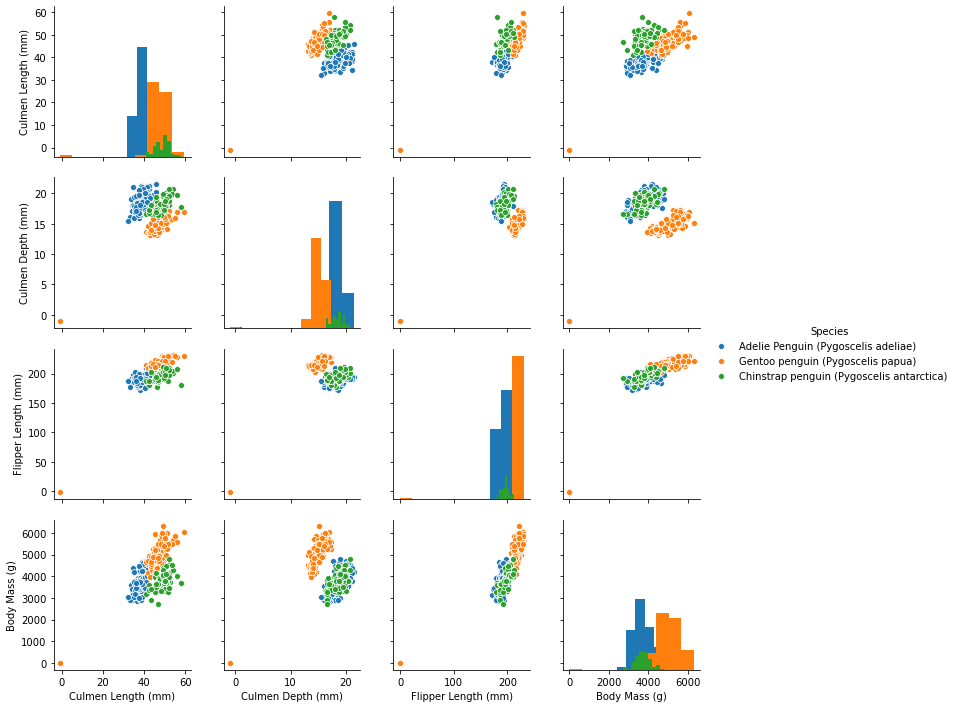

In [11]:
sns.pairplot(data,diag_kind='hist',hue='Species')
plt.show()

In [12]:
'''为了方便我们将标签转化为数字
       'Adelie Penguin (Pygoscelis adeliae)'        ------0
       'Gentoo penguin (Pygoscelis papua)'          ------1
       'Chinstrap penguin (Pygoscelis antarctica)   ------2 '''
def trans(x):
    if x == data['Species'].unique()[0]:
        return 0
    if x == data['Species'].unique()[1]:
        return 1
    if x == data['Species'].unique()[2]:
        return 2

data['Species'] = data['Species'].apply(trans)

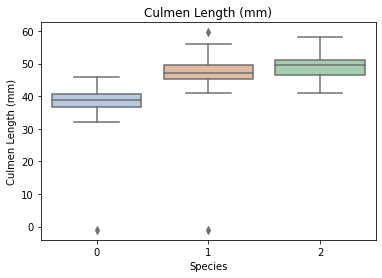

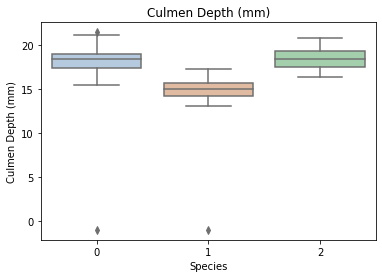

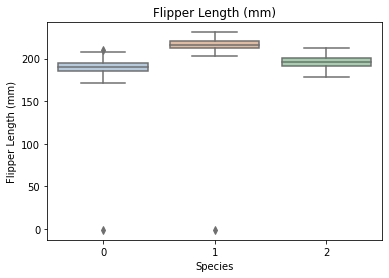

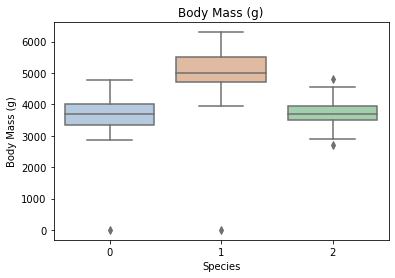

In [13]:
for col in data.columns:
    if col != 'Species':
        sns.boxplot(x='Species',y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()
        

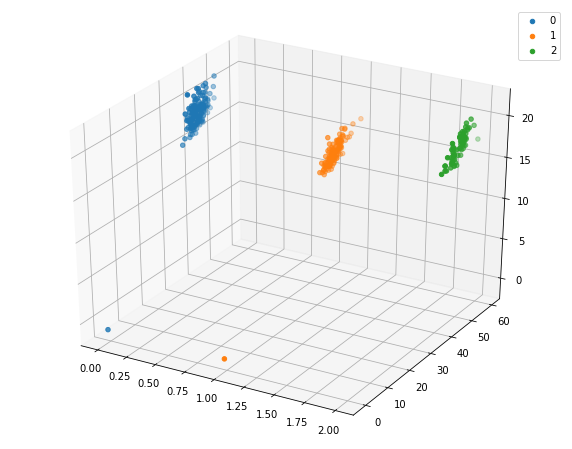

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

data_class0 = data[data['Species']==0].values
data_class1 = data[data['Species']==1].values
data_class2 = data[data['Species']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(data_class0[:,0], data_class0[:,1], data_class0[:,2],label=data['Species'].unique()[0])
ax.scatter(data_class1[:,0], data_class1[:,1], data_class1[:,2],label=data['Species'].unique()[1])
ax.scatter(data_class2[:,0], data_class2[:,1], data_class2[:,2],label=data['Species'].unique()[2])
plt.legend()

plt.show()

# 4、实践

In [15]:
from sklearn.model_selection import train_test_split
data_target_part = data[data['Species'].isin([0,1])][['Species']]
data_features_part = data[data['Species'].isin([0,1])][['Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]

x_train, x_test, y_train, y_test = train_test_split(data_features_part,data_target_part,test_size=0.2,random_state = 20)

In [16]:
## 从sklearn导入决策树模型
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
## 可视化
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("penguins")

'penguins.pdf'

The accuracy of the Logistic Regression is: 0.9954545454545455
The accuracy of the Logistic Regression is: 0.9821428571428571
The confusion matrix result:
 [[31  1]
 [ 0 24]]


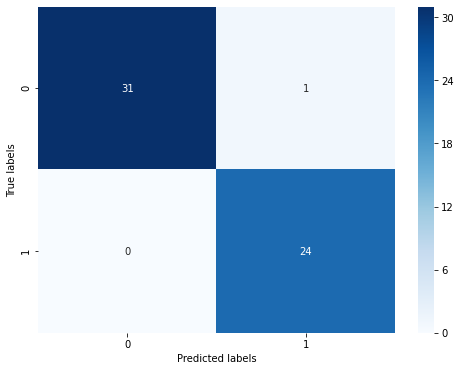

In [18]:

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Step6:利用决策树模型在三分类（多分类）上进行训练和预测

In [19]:
## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data[['Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']], data[['Species']], test_size = 0.2, random_state = 2020)
## 定义 决策树模型 
clf = DecisionTreeClassifier()
# 在训练集上训练决策树模型
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于决策树模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
The accuracy of the Logistic Regression is: 0.9963636363636363
The accuracy of the Logistic Regression is: 0.9710144927536232


The confusion matrix result:
 [[31  1  0]
 [ 0 23  0]
 [ 1  0 13]]


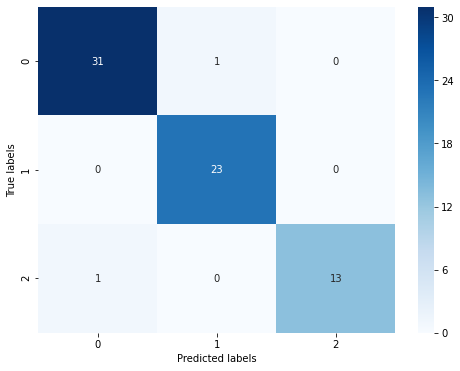

In [21]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()